In [1]:
import pandas as pd

In [2]:
subset_ta = pd.read_csv("C:/Users/user/Downloads/subset_ta.csv")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from lazypredict.Supervised import LazyClassifier

target_variable = "triage_acuity"

# Supposons que votre DataFrame est appelé 'subset_ta' et la colonne de variable cible est 'target_variable'
X = subset_ta.drop([target_variable, 'outcome_hospitalization', "outcome_ed_revisit_3d",'outcome_inhospital_mortality','outcome_critical', 'outcome_icu_transfer_12h'], axis=1)  # Exclure l'ID du patient et la colonne de variable cible pour les fonctionnalités
y = subset_ta[target_variable]  # Définir la colonne de la variable cible

# Créer un objet PolynomialFeatures de degré 2
poly = PolynomialFeatures(2)

# Transformer les données
X_poly = poly.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test avec un échantillonnage stratifié
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.33, stratify=y, random_state=42
)

# Afficher les formes des ensembles d'entraînement et de test résultants
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (3936, 4753) (3936,)
Test set shape: (1939, 4753) (1939,)


In [4]:
# Supposons que votre DataFrame est appelé 'subset_ta' et la colonne de variable cible est 'target_variable'
X1 = subset_ta.drop([target_variable, 'outcome_hospitalization', "outcome_ed_revisit_3d",'outcome_inhospital_mortality','outcome_critical', 'outcome_icu_transfer_12h', 'Unnamed: 0'], axis=1)  # Exclure l'ID du patient et la colonne de variable cible pour les fonctionnalités
y1 = subset_ta[target_variable]  # Définir la colonne de la variable cible

# Diviser les données en ensembles d'entraînement et de test avec un échantillonnage stratifié
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1, y1, test_size=0.33, stratify=y, random_state=42
)

# Afficher les formes des ensembles d'entraînement et de test résultants
print("Train set shape:", X_train1.shape, y_train1.shape)
print("Test set shape:", X_test1.shape, y_test1.shape)

Train set shape: (3936, 95) (3936,)
Test set shape: (1939, 95) (1939,)


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Create the pipeline
pipeline8 = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

# Fit the pipeline to the training data
pipeline8.fit(X_train1, y_train1)

# Extract the feature importances from the Decision Tree classifier
feature_importances = pipeline8.named_steps['classifier'].feature_importances_

# Create a DataFrame to store the feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train1.columns,
    'Importance': feature_importances
})

# Sort the feature importances in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Print the first 15 features
print(feature_importances_df.head(15))

               Feature  Importance
9               ed_los        0.10
27      chiefcomplaint        0.06
21    triage_heartrate        0.06
26         triage_pain        0.05
24          triage_sbp        0.05
0                index        0.04
19        ed_los_hours        0.03
25          triage_dbp        0.03
1           subject_id        0.03
20  triage_temperature        0.03
87   ed_heartrate_last        0.03
2              stay_id        0.03
8                  age        0.03
93               n_med        0.03
5          anchor_year        0.03


In [6]:
# Initialisez un LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Entraînez LazyClassifier sur les données
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Imprimez les performances des modèles
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [11:00<00:00, 22.78s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
DecisionTreeClassifier             1.00               1.00    None      1.00   
BaggingClassifier                  1.00               1.00    None      1.00   
LGBMClassifier                     1.00               1.00    None      1.00   
RandomForestClassifier             0.99               0.99    None      0.99   
ExtraTreesClassifier               0.96               0.96    None      0.96   
LogisticRegression                 0.86               0.86    None      0.86   
CalibratedClassifierCV             0.85               0.85    None      0.84   
LinearSVC                          0.85               0.85    None      0.85   
SGDClassifier                      0.83               0.83    None      0.84   
PassiveAggressiveClassifier        0.83               0.83    None      0.83   
SVC                                0.83 

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Créer un arbre de décision
tree = DecisionTreeClassifier()

# Entraîner le BaggingClassifier
tree.fit(X_train, y_train)

# Faire des prédictions
y_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy and feature importances
print("Accuracy:", accuracy)

Accuracy: 0.998452810727179


In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Création du pipeline
pipeline2 = make_pipeline(
    PCA(n_components=2),  # Spécifiez le nombre de composantes principales souhaitées
    LogisticRegression()  # Utilisez la régression logistique comme modèle
)

# Entraînement du modèle
pipeline2.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred6 = pipeline2.predict(X_test)

# Évaluation du modèle
accuracy6 = pipeline2.score(X_test, y_test)

print("Accuracy: {:.2f}".format(accuracy6))

Accuracy: 0.22


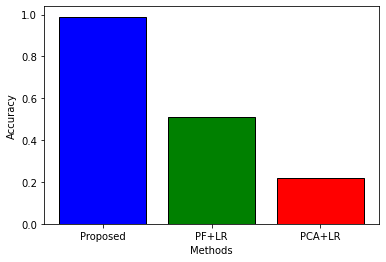

In [9]:
import tikzplotlib
import matplotlib.pyplot as plt
import numpy as np

# List of method names
methods = ['Proposed', 'PF+LR', 'PCA+LR']

# List of accuracies for different methods
accuracies = [0.99, 0.51, 0.22]

# Creating an array of indices for x-axis
x_indices = np.arange(len(methods))

# Custom color for each bar
colors = ['blue', 'green', 'red']

# Plotting the histogram with custom colors
plt.bar(x_indices, accuracies, edgecolor='black', color=colors)

# Setting x-axis tick labels to method names
plt.xticks(x_indices, methods)

# Adding labels and title
plt.xlabel('Methods')
plt.ylabel('Accuracy')

# Saving the histogram as a TikZ file
tikzplotlib.save("HistogramComparison_TA.tex")

In [10]:
from sklearn.metrics import classification_report

# Assuming you have y_test and y_pred from the predictions made by your ExtraTreesClassifier model

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       388
         2.0       1.00      1.00      1.00       387
         3.0       1.00      1.00      1.00       388
         4.0       1.00      1.00      1.00       388
         5.0       1.00      1.00      1.00       388

    accuracy                           1.00      1939
   macro avg       1.00      1.00      1.00      1939
weighted avg       1.00      1.00      1.00      1939



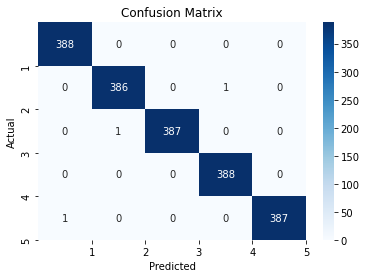

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have y_test and y_pred from the predictions made by your ExtraTreesClassifier model

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=[1, 2, 3, 4, 5])
plt.yticks(ticks=[1, 2, 3, 4, 5], labels=[1, 2, 3, 4, 5])

# Display the colored confusion matrix
plt.show()

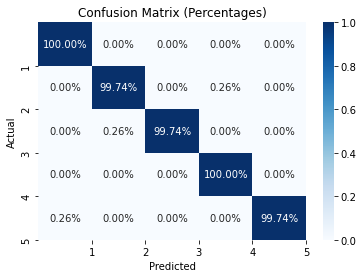

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have y_test and y_pred from the predictions made by your ExtraTreesClassifier model

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the percentages by dividing each element of the confusion matrix by the sum of its corresponding row
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a heatmap of the confusion matrix with percentages
sns.heatmap(cm_percent, annot=True, fmt=".2%", cmap="Blues")

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentages)')
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=[1, 2, 3, 4, 5])
plt.yticks(ticks=[1, 2, 3, 4, 5], labels=[1, 2, 3, 4, 5])

# Display the colored confusion matrix with percentages
plt.show()

In [13]:
X_train.dtype

dtype('float64')

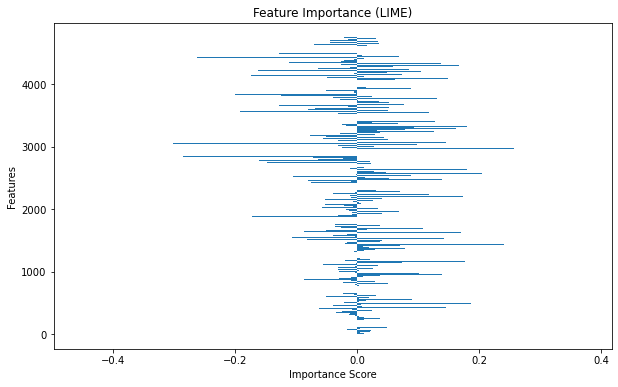

In [14]:
import numpy as np
import lime
import lime.lime_tabular

# Convert X_train back to a DataFrame to extract column names
X_train_df = pd.DataFrame(X_train, columns=['feature_{}'.format(i) for i in range(X_train.shape[1])])

# Define the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_df.values,
    mode="classification",
    feature_names=X_train_df.columns,
    class_names=["Class 1", "Class 2", "Class 3", "Class 4", "Class 5"]  # Replace with your class labels
)

# Select a sample data point for which you want to estimate the variable importance
sample_index = 0  # Replace with the index of your desired sample
sample_instance = X_train_df.iloc[sample_index].values

# Generate LIME explanations for the logistic regression model on the selected instance
explanation = explainer.explain_instance(
    data_row=sample_instance,
    predict_fn=tree.predict_proba,
    num_features=len(X_train_df.columns)
)

# Extract the feature importance scores from the LIME explanation
feature_importance = explanation.as_map()[1]  # Replace 1 with the class index you want to analyze (e.g., 0 for class 0)

# Extract feature names and scores
features = [feature for feature, _ in feature_importance]
scores = [score for _, score in feature_importance]

# Plot the feature importance scores
plt.figure(figsize=(10, 6))
plt.barh(features, scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (LIME)')
plt.show()